In [73]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR

In [79]:
load_df = pd.read_csv('Data/DOM/Load Actuals/Processed/Aggregated/load.csv')
load_df['lag1'] = load_df['MW'].shift()
load_df['lag2'] = load_df['MW'].shift(2)
load_df['lag3'] = load_df['MW'].shift(3)
load_df['lag4'] = load_df['MW'].shift(4)
load_df

,DATE,MW,lag1,lag2,lag3,lag4
0,2010-01-01 00:00:00,10273.0,NaN,NaN,NaN,NaN
1,2010-01-01 01:00:00,9960.0,10273.0,NaN,NaN,NaN
2,2010-01-01 02:00:00,9797.0,9960.0,10273.0,NaN,NaN
3,2010-01-01 03:00:00,9715.0,9797.0,9960.0,10273.0,NaN
4,2010-01-01 04:00:00,9851.0,9715.0,9797.0,9960.0,10273.0
...,...,...,...,...,...,...
87643,2019-12-31 19:00:00,11682.0,11954.0,11767.0,10853.0,10259.0
87644,2019-12-31 20:00:00,11443.0,11682.0,11954.0,11767.0,10853.0
87645,2019-12-31 21:00:00,11167.0,11443.0,11682.0,11954.0,11767.0
87646,2019-12-31 22:00:00,10839.0,11167.0,11443.0,11682.0,11954.0


In [80]:
weather_df = pd.read_csv('Data/DOM/Weather/Processed/Aggregated/weather.csv')
weather_df['DEW_C'] = (weather_df['DEW'] - 32) * (5.0/9)
weather_df['TMP_C'] = (weather_df['TMP'] - 32) * (5.0/9)
weather_df['RH'] = (np.exp((17.625*weather_df['DEW_C'])/(243.04+weather_df['DEW_C']))/np.exp((17.625*weather_df['TMP_C'])/(243.04+weather_df['TMP_C']))) 
weather_df.drop(['TMP', 'DEW', 'WND', 'DEW_C', 'TMP_C'], axis=1, inplace=True)
weather_df

,DATE,CR,HR,XHR,RH
0,2010-01-01 00:00:00,0.0,13.0,1.0,0.924584
1,2010-01-01 01:00:00,0.0,13.0,2.0,0.924584
2,2010-01-01 02:00:00,0.0,13.0,1.0,0.924584
3,2010-01-01 03:00:00,0.0,13.0,2.0,0.961468
4,2010-01-01 04:00:00,0.0,13.0,2.0,0.924584
...,...,...,...,...,...
87643,2019-12-31 19:00:00,0.0,4.0,0.0,0.398229
87644,2019-12-31 20:00:00,0.0,4.0,0.0,0.396591
87645,2019-12-31 21:00:00,0.0,5.0,0.0,0.411376
87646,2019-12-31 22:00:00,0.0,8.0,0.0,0.515690


In [81]:
calendar_df = pd.read_csv('Data/calendar.csv')

calendar_df

,DATE,IS_MONDAY,IS_TUESDAY,IS_WEDNESDAY,IS_THURSDAY,IS_FRIDAY,IS_SATURDAY,IS_SUNDAY,IS_JANUARY,IS_FEBRUARY,...,IS_JULY,IS_AUGUST,IS_SEPTEMBER,IS_OCTOBER,IS_NOVEMBER,IS_DECEMBER,IS_PREVDAY_HOLIDAY,IS_CURRENTDAY_HOLIDAY,IS_NEXTDAY_HOLIDAY,IS_DAYAFTER_HOLIDAY
0,2010-01-01 00:00:00,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2010-01-01 01:00:00,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2010-01-01 02:00:00,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2010-01-01 03:00:00,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2010-01-01 04:00:00,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2019-12-31 19:00:00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
87644,2019-12-31 20:00:00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
87645,2019-12-31 21:00:00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
87646,2019-12-31 22:00:00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [83]:
df = pd.concat([load_df,weather_df, calendar_df]).groupby('DATE').mean()

df = df[4:]
df

,MW,lag1,lag2,lag3,lag4,CR,HR,XHR,RH,IS_MONDAY,...,IS_JULY,IS_AUGUST,IS_SEPTEMBER,IS_OCTOBER,IS_NOVEMBER,IS_DECEMBER,IS_PREVDAY_HOLIDAY,IS_CURRENTDAY_HOLIDAY,IS_NEXTDAY_HOLIDAY,IS_DAYAFTER_HOLIDAY
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-01 04:00:00,9851.0,9715.0,9797.0,9960.0,10273.0,0.0,13.0,2.0,0.924584,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01 05:00:00,10178.0,9851.0,9715.0,9797.0,9960.0,0.0,13.0,1.0,0.924584,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01 06:00:00,10497.0,10178.0,9851.0,9715.0,9797.0,0.0,13.0,2.0,0.924584,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01 07:00:00,10749.0,10497.0,10178.0,9851.0,9715.0,0.0,13.0,1.0,0.888800,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01 08:00:00,11000.0,10749.0,10497.0,10178.0,9851.0,0.0,13.0,2.0,0.924256,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,11682.0,11954.0,11767.0,10853.0,10259.0,0.0,4.0,0.0,0.398229,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2019-12-31 20:00:00,11443.0,11682.0,11954.0,11767.0,10853.0,0.0,4.0,0.0,0.396591,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2019-12-31 21:00:00,11167.0,11443.0,11682.0,11954.0,11767.0,0.0,5.0,0.0,0.411376,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [78]:
from statsmodels.tsa.stattools import adfuller

mw = df['MW'].values
result = adfuller(mw)
print('ADF statistics: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF statistics: -13.276484
p-value: 0.000000
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


C:\Users\Ali\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


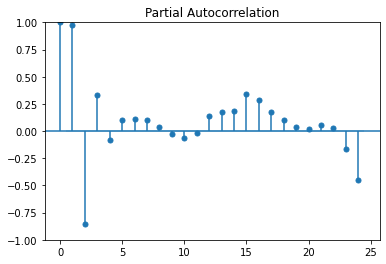

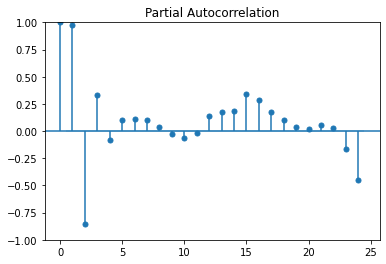

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(mw, lags=24)

In [87]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [88]:
from sklearn.model_selection import train_test_split

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [112]:
import optunity
import optunity.metrics

data = x_val.values
data

targets = y_val.values

In [113]:
# we will use nested 3-fold cross-validation
# in the outer cross-validation pmseedure
# we make the decorator explicitly so we can reuse the same folds
# in both tuned and untuned approaches
outer_cv = optunity.cross_validated(x=data, y=targets, num_folds=3)

# compute area under mse curve of default parameters
def compute_mse_standard(x_train, y_train, x_test, y_test):
    model = SVR().fit(x_train, y_train)
    predictions = model.predict(x_test)
    return optunity.metrics.mse(y_test, predictions)

# decorate with cross-validation
compute_mse_standard = outer_cv(compute_mse_standard)
mse_standard = compute_mse_standard()
print('Nested cv mean squared error of non-tuned model: ' + str(mse_standard))

Nested cv mean squared error of non-tuned model: 4288108.693858462


In [114]:
def compute_mse_rbf_tuned(x_train, y_train, x_test, y_test):
    """Computes MSE of an SVR with RBF kernel and optimized hyperparameters."""

    # define objective function for tuning
    @optunity.cross_validated(x=x_train, y=y_train, num_iter=2, num_folds=5)
    def tune_cv(x_train, y_train, x_test, y_test, C, gamma):
        model = SVR(C=C, gamma=gamma).fit(x_train, y_train)
        predictions = model.predict(x_test)
        return optunity.metrics.mse(y_test, predictions)

    # optimize parameters
    optimal_pars, _, _ = optunity.minimize(tune_cv, 200, C=[1, 1000], gamma=[0, 50])
    print("optimal hyperparameters: " + str(optimal_pars))

    tuned_model = SVR(**optimal_pars).fit(x_train, y_train)
    predictions = tuned_model.predict(x_test)
    return optunity.metrics.mse(y_test, predictions)

# wrap with outer cross-validation
compute_mse_rbf_tuned = outer_cv(compute_mse_rbf_tuned)

In [115]:
compute_mse_rbf_tuned()

KeyboardInterrupt: 

In [91]:
#model = SVR(kernel='rbf', C=701.3536328125001, gamma=0.023333005593254352)
model = SVR(kernel='rbf', C=701.3536328125001, gamma=0.023333005593254352)
model.fit(x_train_scaled, y_train)

SVR(C=701.3536328125001, gamma=0.023333005593254352)

In [96]:
y_pred_scaled = model.predict(x_test_scaled)

,lag1,lag2,lag3,lag4,CR,HR,XHR,RH,IS_MONDAY,IS_TUESDAY,...,IS_JULY,IS_AUGUST,IS_SEPTEMBER,IS_OCTOBER,IS_NOVEMBER,IS_DECEMBER,IS_PREVDAY_HOLIDAY,IS_CURRENTDAY_HOLIDAY,IS_NEXTDAY_HOLIDAY,IS_DAYAFTER_HOLIDAY
8597,0.725088,0.843938,0.868530,0.830384,-0.615707,0.978722,-0.385902,-0.887936,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,3.282986,-0.177694,-0.17646,-0.176918,-0.177831
8598,1.317090,1.494203,1.623980,1.579547,-0.615707,2.727641,4.056719,-0.952960,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,-0.304601,-0.177694,-0.17646,-0.176918,-0.177831
8599,-0.181645,-0.505455,-0.625264,-0.649204,-0.615707,1.137715,0.058360,1.563715,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,3.282986,-0.177694,-0.17646,-0.176918,-0.177831
8600,-1.144972,-1.299863,-1.327771,-1.288783,-0.615707,-0.770198,-0.385902,0.581111,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,-0.304601,-0.177694,-0.17646,-0.176918,-0.177831
8601,-0.596535,-0.360499,-0.208647,-0.178685,-0.314031,-0.770198,-0.385902,-0.694021,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,-0.304601,-0.177694,-0.17646,-0.176918,-0.177831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760,0.453516,0.094320,-0.167107,-0.247124,-0.615707,0.183758,-0.385902,-0.707127,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,-0.304601,-0.177694,-0.17646,-0.176918,-0.177831
8761,0.944951,1.256003,1.405694,1.393377,2.099378,-0.770198,-0.385902,-1.554683,-0.411251,-0.410897,...,-0.303317,-0.307603,3.347639,-0.304511,-0.298446,-0.304601,-0.177694,-0.17646,-0.176918,-0.177831
8762,0.857006,0.870812,0.983782,1.092734,-0.615707,1.932678,2.279670,-1.319058,2.431607,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,-0.304601,-0.177694,-0.17646,-0.176918,-0.177831
8763,-0.004533,0.030393,0.091497,0.194064,-0.615707,0.660736,-0.385902,0.491154,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,3.282986,-0.177694,-0.17646,-0.176918,-0.177831


In [110]:
week_ahead_data = x_test_scaled[-168:]
week_ahead_data.loc[:, 'lag1'] = 0
week_ahead_data.loc[:, 'lag2'] = 0
week_ahead_data.loc[:, 'lag3'] = 0
week_ahead_data.loc[:, 'lag4'] = 0

week_ahead_predict = model.predict(week_ahead_data)
week_ahead_loads = y_test[-168:]
week_ahead_loads.drop(['pred'], axis=1, inplace=True)
df

C:\Users\Ali\AppData\Local\Temp\ipykernel_7732\3572756598.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_ahead_loads.drop(['pred'], axis=1, inplace=True)


,MW,lag1,lag2,lag3,lag4,CR,HR,XHR,RH,IS_MONDAY,...,IS_JULY,IS_AUGUST,IS_SEPTEMBER,IS_OCTOBER,IS_NOVEMBER,IS_DECEMBER,IS_PREVDAY_HOLIDAY,IS_CURRENTDAY_HOLIDAY,IS_NEXTDAY_HOLIDAY,IS_DAYAFTER_HOLIDAY
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-01 04:00:00,9851.0,0,0,0,0,0.0,13.0,2.0,0.924584,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01 05:00:00,10178.0,0,0,0,0,0.0,13.0,1.0,0.924584,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01 06:00:00,10497.0,0,0,0,0,0.0,13.0,2.0,0.924584,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01 07:00:00,10749.0,0,0,0,0,0.0,13.0,1.0,0.888800,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-01-01 08:00:00,11000.0,0,0,0,0,0.0,13.0,2.0,0.924256,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,11682.0,0,0,0,0,0.0,4.0,0.0,0.398229,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2019-12-31 20:00:00,11443.0,0,0,0,0,0.0,4.0,0.0,0.396591,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2019-12-31 21:00:00,11167.0,0,0,0,0,0.0,5.0,0.0,0.411376,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [111]:
from sklearn.metrics import mean_absolute_percentage_error

print(100 * mean_absolute_percentage_error(week_ahead_loads, week_ahead_predict))
week_ahead_loads['pred'] = week_ahead_predict
print(week_ahead_loads)

1.7430472699089667
                          MW          pred
DATE                                      
2019-12-05 22:00:00  12266.0  12535.500648
2011-01-09 11:00:00  13831.0  14058.047922
2014-12-03 06:00:00  11885.0  11417.072840
2017-06-29 06:00:00   8937.0   8897.694823
2017-03-01 22:00:00   8891.0   9132.970309
...                      ...           ...
2018-03-07 19:00:00  12477.0  12731.421815
2017-09-28 19:00:00  13094.0  12591.909361
2011-01-10 16:00:00  13790.0  13304.992275
2016-12-08 15:00:00  11197.0  11024.513046
2015-10-31 05:00:00   8315.0   8205.982704

[168 rows x 2 columns]


C:\Users\Ali\AppData\Local\Temp\ipykernel_7732\2050025839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_ahead_loads['pred'] = week_ahead_predict


In [95]:
y_test = pd.DataFrame(data = y_test)
y_test['pred'] = y_pred_scaled
y_test

,MW,pred
DATE,,
2018-08-12 14:00:00,15043.0,15262.689852
2015-03-10 00:00:00,8862.0,8752.042341
2017-08-09 16:00:00,14488.0,14286.020681
2013-09-13 23:00:00,9093.0,9131.619091
2011-05-05 02:00:00,7004.0,7088.922504
...,...,...
2018-03-07 19:00:00,12477.0,12731.421815
2017-09-28 19:00:00,13094.0,12591.909361
2011-01-10 16:00:00,13790.0,13304.992275


In [122]:
single_pred = week_ahead_data.iloc[-1]
week_ahead_data


,lag1,lag2,lag3,lag4,CR,HR,XHR,RH,IS_MONDAY,IS_TUESDAY,...,IS_JULY,IS_AUGUST,IS_SEPTEMBER,IS_OCTOBER,IS_NOVEMBER,IS_DECEMBER,IS_PREVDAY_HOLIDAY,IS_CURRENTDAY_HOLIDAY,IS_NEXTDAY_HOLIDAY,IS_DAYAFTER_HOLIDAY
8597,0.725088,0.843938,0.868530,0.830384,-0.615707,0.978722,-0.385902,-0.887936,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,3.282986,-0.177694,-0.17646,-0.176918,-0.177831
8598,1.317090,1.494203,1.623980,1.579547,-0.615707,2.727641,4.056719,-0.952960,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,-0.304601,-0.177694,-0.17646,-0.176918,-0.177831
8599,-0.181645,-0.505455,-0.625264,-0.649204,-0.615707,1.137715,0.058360,1.563715,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,3.282986,-0.177694,-0.17646,-0.176918,-0.177831
8600,-1.144972,-1.299863,-1.327771,-1.288783,-0.615707,-0.770198,-0.385902,0.581111,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,-0.304601,-0.177694,-0.17646,-0.176918,-0.177831
8601,-0.596535,-0.360499,-0.208647,-0.178685,-0.314031,-0.770198,-0.385902,-0.694021,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,-0.304601,-0.177694,-0.17646,-0.176918,-0.177831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760,0.453516,0.094320,-0.167107,-0.247124,-0.615707,0.183758,-0.385902,-0.707127,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,-0.304601,-0.177694,-0.17646,-0.176918,-0.177831
8761,0.944951,1.256003,1.405694,1.393377,2.099378,-0.770198,-0.385902,-1.554683,-0.411251,-0.410897,...,-0.303317,-0.307603,3.347639,-0.304511,-0.298446,-0.304601,-0.177694,-0.17646,-0.176918,-0.177831
8762,0.857006,0.870812,0.983782,1.092734,-0.615707,1.932678,2.279670,-1.319058,2.431607,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,-0.304601,-0.177694,-0.17646,-0.176918,-0.177831
8763,-0.004533,0.030393,0.091497,0.194064,-0.615707,0.660736,-0.385902,0.491154,-0.411251,-0.410897,...,-0.303317,-0.307603,-0.298718,-0.304511,-0.298446,3.282986,-0.177694,-0.17646,-0.176918,-0.177831
